# VIMS VIS/IR wavelengths

Sources:
* [VIMS calibration RC19 - Final report](https://pds-atmospheres.nmsu.edu/data_and_services/atmospheres_data/Cassini/logs/clark-et-al_vims-radiometric-calibration-pds-2018-v2.0-a.pdf)
* [VIMS Time shift](https://pds-atmospheres.nmsu.edu/data_and_services/atmospheres_data/Cassini/logs/VIMS%20IR%20Pixel%20Timing_final-a.pdf)

In [1]:
import matplotlib.pyplot as plt

from pyvims import VIMS_IR, VIMS_VIS

## Get VIMS wavelength

Display all the standard IR wavelengths:

In [2]:
VIMS_IR()

array([0.88421 , 0.900753, 0.916924, 0.933078, 0.949803, 0.965683,
       0.982262, 0.99882 , 1.01479 , 1.03132 , 1.04755 , 1.06541 ,
       1.08183 , 1.09806 , 1.11396 , 1.13024 , 1.14695 , 1.1637  ,
       1.17996 , 1.19622 , 1.21246 , 1.22859 , 1.24492 , 1.26166 ,
       1.27813 , 1.29482 , 1.31091 , 1.32695 , 1.34324 , 1.35952 ,
       1.37695 , 1.39326 , 1.4094  , 1.42557 , 1.44184 , 1.45841 ,
       1.47514 , 1.49169 , 1.50794 , 1.52421 , 1.54035 , 1.55674 ,
       1.57361 , 1.59018 , 1.60228 , 1.62523 , 1.6416  , 1.65567 ,
       1.67238 , 1.68901 , 1.70536 , 1.72175 , 1.73802 , 1.75436 ,
       1.77105 , 1.78771 , 1.80401 , 1.82004 , 1.83616 , 1.85288 ,
       1.86933 , 1.88679 , 1.90261 , 1.91916 , 1.93545 , 1.95191 ,
       1.96871 , 1.98531 , 2.00167 , 2.01781 , 2.03424 , 2.05091 ,
       2.06757 , 2.084   , 2.10034 , 2.11667 , 2.13337 , 2.15018 ,
       2.16652 , 2.18288 , 2.1992  , 2.21591 , 2.23282 , 2.24952 ,
       2.26622 , 2.28238 , 2.29921 , 2.31612 , 2.33325 , 2.350

Get a single wavelength for a specific band:

In [3]:
VIMS_IR(band=126)

1.35952

Get the wavelengths for a list of bands:

In [4]:
VIMS_IR(band=[97, 126, 352])

array([0.88421, 1.35952, 5.1225 ])

Get full width at half-maximum value (FWHM) for a specific band:

In [5]:
VIMS_IR(band=126, fwhm=True)

0.013663

Get the wavenumber for a specific band:

In [6]:
VIMS_IR(band=126, sigma=True)

7355.537248440626

Get the wavenumber FWHM for a specific band:

In [7]:
VIMS_IR(band=126, fwhm=True, sigma=True)

73.92406369841501

## IR wavelength shift with time

In [8]:
VIMS_IR(band=97, year=2000), VIMS_IR(band=97, year=2002), VIMS_IR(band=97, year=2017.5)

(0.85841, 0.88421, 0.8939100000000001)

__Note:__ Wavelength shift is unknow for the visible channels.

## Band wavelength dependency

In [9]:
BANDS_VIS = [i + 1 for i in range(96)]
BANDS_IR = [i + 97 for i in range(256)]

bticks = [1] + BANDS_VIS[23::24] + BANDS_IR[31::32]

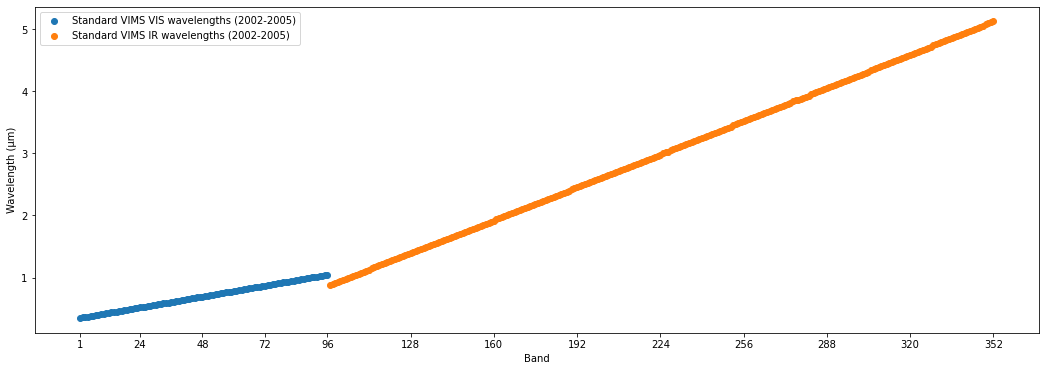

In [10]:
plt.figure(figsize=(18, 6))

plt.scatter(BANDS_VIS, VIMS_VIS(), label='Standard VIMS VIS wavelengths (2002-2005)')
plt.scatter(BANDS_IR, VIMS_IR(), label='Standard VIMS IR wavelengths (2002-2005)')

plt.xlabel('Band')
plt.ylabel('Wavelength (μm)')
plt.xticks(bticks)

plt.legend();

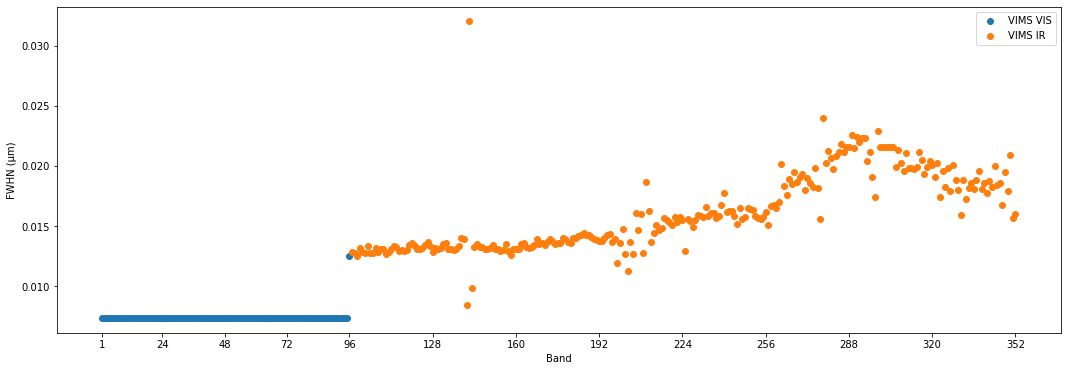

In [11]:
plt.figure(figsize=(18, 6))

plt.scatter(BANDS_VIS, VIMS_VIS(fwhm=True), label='VIMS VIS')
plt.scatter(BANDS_IR, VIMS_IR(fwhm=True), label='VIMS IR')

plt.xlabel('Band')
plt.ylabel('FWHN (μm)')
plt.xticks(bticks)

plt.legend();

In [12]:
YEARS = [i / 4 + 1999.75 for i in range(73)]

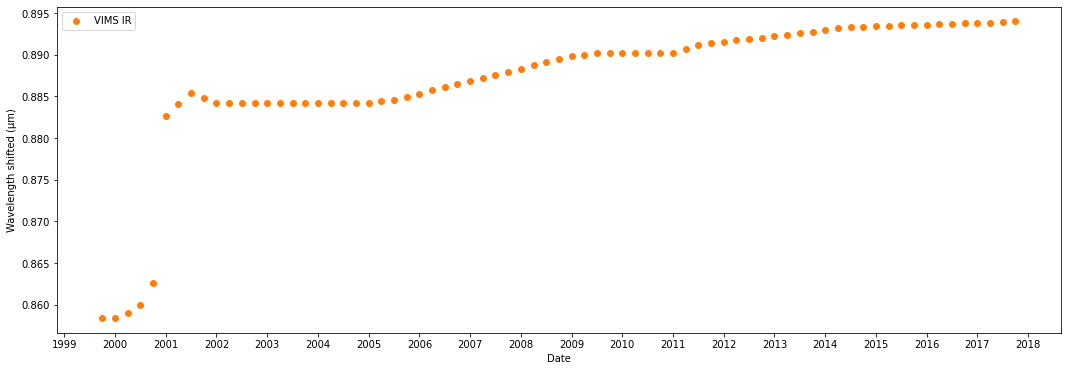

In [13]:
plt.figure(figsize=(18, 6))

plt.scatter(YEARS, [VIMS_IR(band=97, year=year) for year in YEARS], label='VIMS IR', color='tab:orange')

plt.xlabel('Date')
plt.ylabel('Wavelength shifted (μm)')
plt.xticks([year for year in range(1999, 2019)])

plt.legend();

## Represent as wavenumber

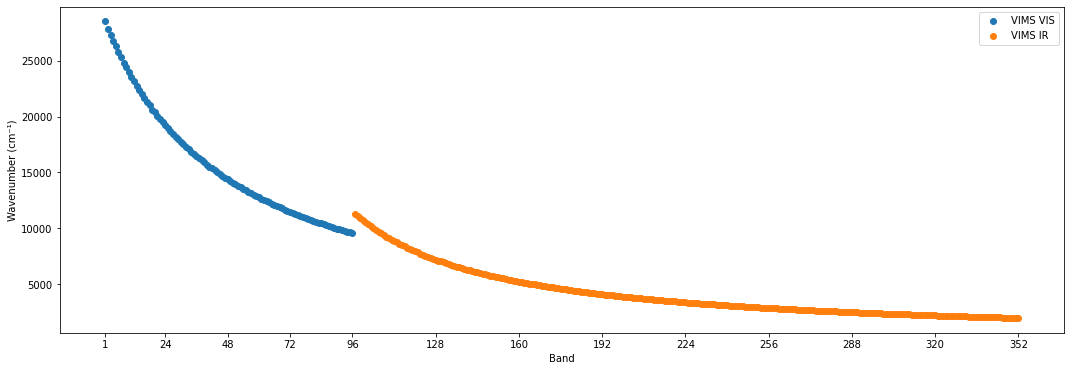

In [14]:
plt.figure(figsize=(18, 6))

plt.scatter(BANDS_VIS, VIMS_VIS(sigma=True), label='VIMS VIS')
plt.scatter(BANDS_IR, VIMS_IR(sigma=True), label='VIMS IR')

plt.xlabel('Band')
plt.ylabel('Wavenumber (cm⁻¹)')
plt.xticks(bticks)

plt.legend();

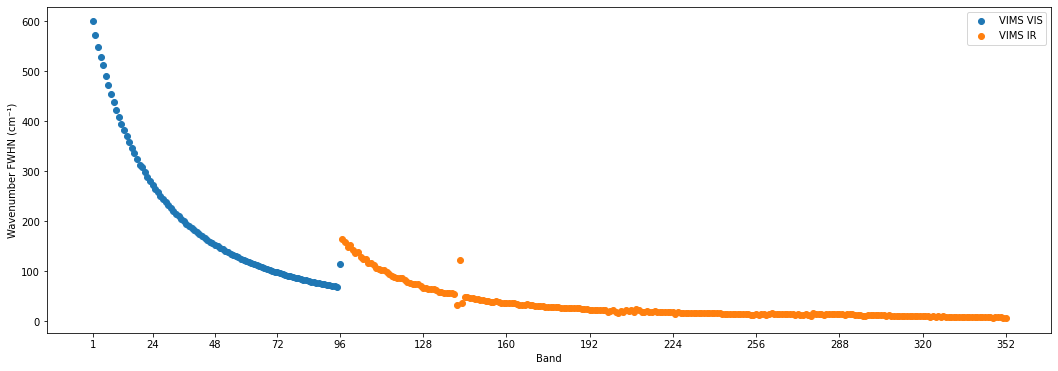

In [15]:
plt.figure(figsize=(18, 6))

plt.scatter(BANDS_VIS, VIMS_VIS(fwhm=True, sigma=True), label='VIMS VIS')
plt.scatter(BANDS_IR, VIMS_IR(fwhm=True, sigma=True), label='VIMS IR')

plt.xlabel('Band')
plt.ylabel('Wavenumber FWHN (cm⁻¹)')
plt.xticks(bticks)

plt.legend();

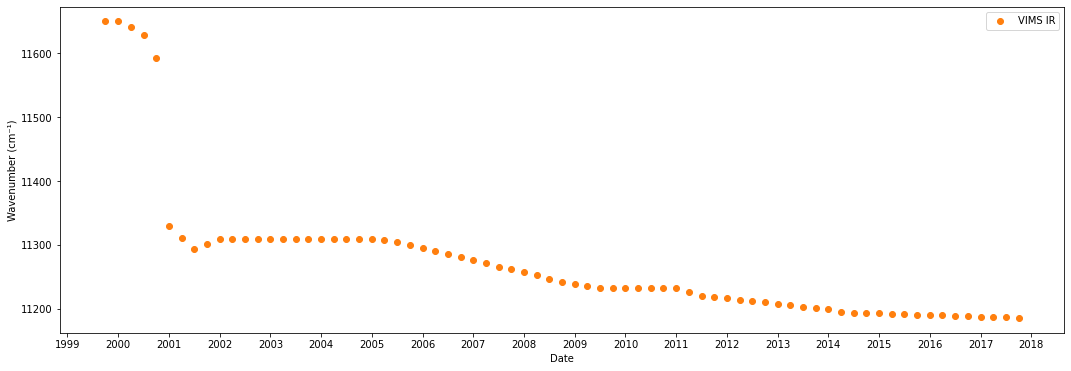

In [16]:
plt.figure(figsize=(18, 6))

plt.scatter(YEARS, [VIMS_IR(band=97, year=year, sigma=True) for year in YEARS], label='VIMS IR', color='tab:orange')

plt.xlabel('Date')
plt.ylabel('Wavenumber (cm⁻¹)')
plt.xticks([year for year in range(1999, 2019)])

plt.legend();